In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

#import utils

%matplotlib inline

DATA_FILE = 'data/fire_theft.xls'

## Step 1: read in data from the .xls file


In [39]:
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

np.shape(data)

(42, 2)

#### Adding feature $x_0 = 1$  for every examples.
So We don't have to calculate bias term separately. It will be calculated as $w_0$ in the $w$

In [40]:
data = np.c_[ np.ones((n_samples, 1)), data] 

np.shape(data)

(42, 3)

Our data had only one feature $x_1$ and target variable $y$. But after this  our data now consist of two features - $x_0$ and $x_1$, and also target variable $y$.

## Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
<span style="color:red">\** Note this step is different than previous one </span>


In [41]:
X = tf.constant(data[:,:2], tf.float32, shape=[n_samples,2]) ##first 2 columns are x0 and x1 features respectively
Y = tf.constant(data[:,2], tf.float32, shape=[n_samples,1])  ##third column is the target 



## Step 3: Calculate Weight vector 
<span style="color:red">\** Note this step is different than previous one </span>

We have seen the **Normalized Equation** is:

$W = (X^TX)^{-1} X^Ty $


In [42]:
W = tf.matmul(tf.matrix_inverse(tf.matmul(X, X, transpose_a=True)),tf.matmul(X,Y,transpose_a = True))

## Step 4: build model to predict Y
<span style="color:red">\** Note this step is different than previous one </span>


In [43]:
Y_predicted = tf.matmul(X, W)

## Step 5: use the square error as the loss function


In [44]:
loss = tf.square(Y - Y_predicted, name='loss')

## Step 6: using gradient descent with learning rate of 0.01 to minimize loss

<span style="color:red">\** No need of this step as we are calculating Weights values directly from equation </span>


## Step 7, 8, 9 -> inside tf.session()

#### Step 7: initialize the necessary variables, in this case, w and b
#### Step 8: train the model
#### Step 9: output the values of w and b


In [45]:
with tf.Session() as sess:
    
    # Step 7: initialize the necessary variables 
    W_values, l = sess.run([W, loss])
    
    total_loss =np.sum(l)
    print('MSE: {0}'.format(total_loss/n_samples))
    # Step 8: train the model
    
      
    # Step 9: output the values of w and b
    
    w_0, w_1 = sess.run([w[0], w[1]]) 

MSE: 360.8201497395833


In [46]:
print(w_0)
print(w_1)

[ 16.99516296]
[ 1.31345558]


# Plot the results


In [47]:
data = np.delete(data, 0, 1)
np.shape(data)

(42, 2)

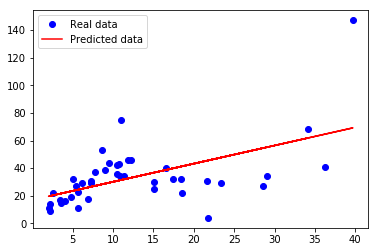

In [48]:
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_1 + w_0, 'r', label='Predicted data')
plt.legend()
plt.show()

## Compare with the SGD and BGD version

SGD with **100 epoch** and **learning rate = .00001**


BGD with **100 epoch** and **learning rate = .00001**


|                  | **bias**(b)   | **Weight**(w) | **Cost**         |
| ---------------- |:-------------:| -------------:| ----------------:|
| **SGD**          | 0.611998      | 2.13033       | 463.52           |
| **BGD**          | 0.612963      | 2.13865       | 457.91           |
|**Normal(OLS)Eqn**| 16.99516296   | 1.31345558    | 360.82014974     |


